# FFT

## 単振動

* 変位$x$ [m]
* 振幅$a$ [m]
* 角振動数$\omega$ [rad/s]
* 初期位相角$\phi$ [rad]

* 単振動（角振動数$\omega$による表現）
$$
\begin{split}
    x & = a \cos \left( \omega t + \phi \right) \\
    x & = a \sin \left( \omega t + \phi + \pi/2 \right)
\end{split}
$$

* 周期$T$ [s]
$$
    T = \frac{2 \pi}{\omega}
$$

* 周波数$f$ [Hz]=[1/s]
$$
\begin{split}
    f & = \frac{1}{T} = \frac{\omega}{2 \pi} \\
    \omega & = 2 \pi f
\end{split}
$$

* 単振動（周波数$f$による表現）
$$
\begin{split}
    x & = a \cos \left( 2 \pi f t + \phi \right) \\
    x & = a \sin \left( 2 \pi f t + \phi + \pi/2 \right)
\end{split}
$$

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Meiryo'
mpl.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (10, 6)

sampling_duration = 3                 # [s]
sampling_freq     = 100               # [Hz]=[1/s]
sampling_period   = 1 / sampling_freq # [s]
sampling_num      = sampling_freq * sampling_duration # [point]

print('duration = {0} [s]'.format(sampling_duration))
print('freq     = {0} [Hz]'.format(sampling_freq))
print('period   = {0} [s]'.format(sampling_period))
print('num      = {0} [point]'.format(sampling_num));

duration = 3 [s]
freq     = 100 [Hz]
period   = 0.01 [s]
num      = 300 [point]


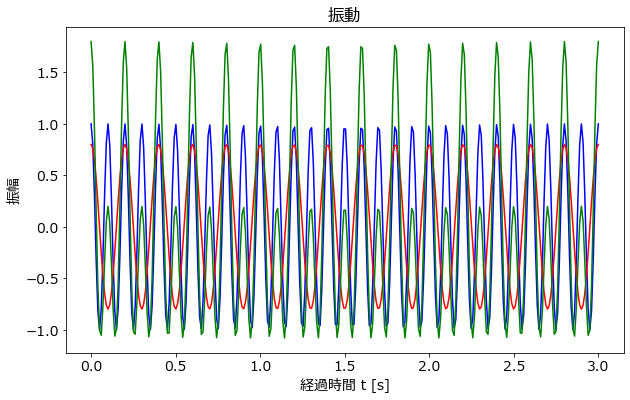

In [2]:
t = np.linspace(0, sampling_duration, sampling_num)

# 波形1
a1 = 1
f1 = 10 # [Hz]
x1 = a1 * np.cos(2 * np.pi * f1 * t)

# 波形2
a2 = 0.8
f2 = 5 # [Hz]
x2 = a2 * np.cos(2 * np.pi * f2 * t)

# 波形3 (波形1 + 波形2)
x3 = x1 + x2

fig = plt.figure()
ax = plt.axes()
ax.set_title('振動')
ax.set_xlabel('経過時間 t [s]')
ax.set_ylabel('振幅');

ax.plot(t, x1, color='blue')
ax.plot(t, x2, color='red') 
ax.plot(t, x3, color='green');

## FFT

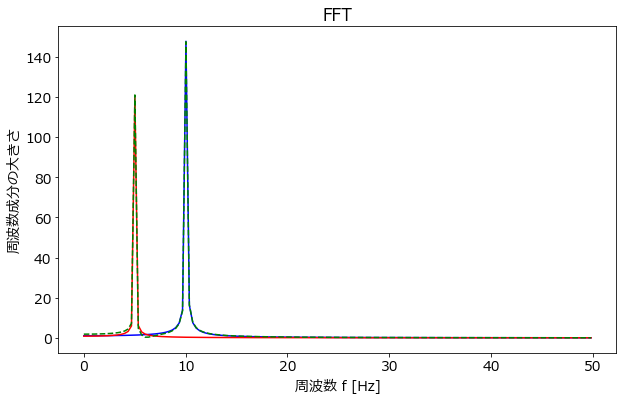

In [3]:
import scipy.fft

# 周波数軸
f = np.linspace(0, sampling_freq, sampling_num)

fft1 = scipy.fft.fft(x1)
fft2 = scipy.fft.fft(x2)
fft3 = scipy.fft.fft(x3)

fig = plt.figure()
ax = plt.axes()
ax.set_title('FFT')
ax.set_xlabel('周波数 f [Hz]')
ax.set_ylabel('周波数成分の大きさ');

# 周波数軸の最大は、ナイキスト周波数まで表示
ax.plot(f[:sampling_num//2], np.abs(fft1[:sampling_num//2]), color='blue');
ax.plot(f[:sampling_num//2], np.abs(fft2[:sampling_num//2]), color='red');
ax.plot(f[:sampling_num//2], np.abs(fft3[:sampling_num//2]), color='green', linestyle='dashed');

## 参考
[1] 藤田勝久, 振動工学 新装版 振動の基礎から実用解析入門まで, 森北出版, 2016<br>
[2] 涌井良幸, 涌井貞美, 道具としてのフーリエ解析, 日本実業出版社, 2014<br>
[3] もものきとデータ解析をはじめよう, 2018, https://momonoki2017.blogspot.com/2018/03/pythonfft-2.html

## Pythonライブラリバージョン

In [4]:
np.__version__

'1.19.2'

In [5]:
mpl.__version__

'3.3.2'

In [6]:
import scipy
scipy.__version__

'1.5.2'